In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("W6Records.csv")

'ques' is the column indicating whether the subject line is phrased as a question. <br />
'short' is the column indicating whether the email body is short. <br />
'tues' is the column indicating whether the email is sent in Tues(ealier).  <br />
control_treat? 0 is students who have not received emails, but what about 1/2/3? <br />
short_ques_group? 

In [4]:
# deadline for this hw is 2020-02-14 17:00
deadline = pd.to_datetime('2020-02-14 17:00')

In [5]:
# time to deadline (in hours)
data['time_to_deadline'] = (deadline - pd.to_datetime(data['timestamp'])) / np.timedelta64(1, 'h')

In [6]:
# filter out record submitted before ddl
data = data[data['time_to_deadline'] > 0]

In [7]:
# group by student, and record start and end time to ddl, control_treat, ques, short and tues
filtered_data = data.groupby('anonid').agg({'time_to_deadline': [np.min, np.max], 
                                            'control_treat': 'first', 'ques': 'first', 'short': 'first', 'tues': 'first'})

In [8]:
filtered_data

time_to_deadline  \
                                                               amin   
anonid                                                                
0007e42a5bc115f2a7ad477c7b1b64caaf489923a4fe79a...        18.300000   
004eafef5f4a0e696dc7653fb7c2fc9c853747b49a547b4...        49.950000   
0074b750145eb30cb9cde8c321c894a75b7a948ffc93280...        46.133333   
0084c3e7abf573be455b8dcf88312f369a592f48ed5e8fb...        97.250000   
008f434a94f494297c1c2089d7a78ec42394206a72f9958...        50.600000   
...                                                             ...   
fe099a729b42940b8ea2b63c7c70b59c3673ee636891361...         1.033333   
fe5221604a94f2dc962e66f6747ad4e3e169a09ee038847...         6.616667   
fe6c1273d08c32fa4f872b6d2d53b8d64dee22ffab8d7cf...        73.516667   
ff49309463c1dbfb875645b7179c7dca683a02765094967...        26.950000   
ff68a1fe034745eb6de9238555741c23307396741dfcb0c...         4.133333   

                                                              control_treat  \
                                                         amax         first   
anonid                                                                        
0007e42a5bc115f2a7ad477c7b1b64caaf489923a4fe79a...  18.666667             1   
004eafef5f4a0e696dc7653fb7c2fc9c853747b49a547b4...  50.400000             1   
0074b750145eb30cb9cde8c321c894a75b7a948ffc93280...  46.250000             1   
0084c3e7abf573be455b8dcf88312f369a592f48ed5e8fb...  97.616667             1   
008f434a94f494297c1c2089d7a78ec42394206a72f9958...  64.850000             0   
...                                                       ...           ...   
fe099a729b42940b8ea2b63c7c70b59c3673ee636891361...   1.133333             2   
fe5221604a94f2dc962e66f6747ad4e3e169a09ee038847...   6.633333             1   
fe6c1273d08c32fa4f872b6d2d53b8d64dee22ffab8d7cf...  73.600000             3   
ff49309463c1dbfb875645b7179c7dca683a02765094967...  26.966667             0   
ff68a1fe034745eb6de9238555741c23307396741dfcb0c...   4.366667             0   

                                                    ques short  tues  
                                                   first first first  
anonid                                                                
0007e42a5bc115f2a7ad477c7b1b64caaf489923a4fe79a...   0.0   1.0   0.0  
004eafef5f4a0e696dc7653fb7c2fc9c853747b49a547b4...   0.0   1.0   1.0  
0074b750145eb30cb9cde8c321c894a75b7a948ffc93280...   0.0   1.0   1.0  
0084c3e7abf573be455b8dcf88312f369a592f48ed5e8fb...   1.0   0.0   0.0  
008f434a94f494297c1c2089d7a78ec42394206a72f9958...   NaN   NaN   NaN  
...                                                  ...   ...   ...  
fe099a729b42940b8ea2b63c7c70b59c3673ee636891361...   1.0   1.0   1.0  
fe5221604a94f2dc962e66f6747ad4e3e169a09ee038847...   1.0   1.0   1.0  
fe6c1273d08c32fa4f872b6d2d53b8d64dee22ffab8d7cf...   0.0   0.0   0.0  
ff49309463c1dbfb875645b7179c7dca683a02765094967...   NaN   NaN   NaN  
ff68a1fe034745eb6de9238555741c23307396741dfcb0c...   NaN   NaN   NaN  

[784 rows x 6 columns]

In [9]:
# initialize a new df to store formatted columns
reduced_table = pd.DataFrame(index=filtered_data.index)

In [10]:
# control_treat is 0 for students with no email, and 1/2/3 for students with email
no_emails = filtered_data['control_treat'] == 0
reduced_table['email_yes'] = np.invert(no_emails).astype(int)
reduced_table['email_no'] = no_emails.astype(int)

In [11]:
reduced_table['hours_start'] = filtered_data['time_to_deadline']['amax']
reduced_table['hours_end'] = filtered_data['time_to_deadline']['amin']
reduced_table['message_short'] = (filtered_data['short'] == 1).astype(int)
reduced_table['message_long'] = (filtered_data['short'] == 0).astype(int)
reduced_table['subject_ques'] = (filtered_data['ques'] == 1).astype(int)
reduced_table['subject_stat'] = (filtered_data['ques'] == 0).astype(int)
reduced_table['day_tue'] = (filtered_data['tues'] == 1).astype(int)
reduced_table['day_thu'] = (filtered_data['tues'] == 0).astype(int)

In [12]:
reduced_table

,email_yes,email_no,hours_start,hours_end,message_short,message_long,subject_ques,subject_stat,day_tue,day_thu
anonid,,,,,,,,,,
0007e42a5bc115f2a7ad477c7b1b64caaf489923a4fe79a654cfd433d5f3700fedc4ab44c55a6e4bc3384c6b3ed352844f601655763be908242b5791e5f05f99,1,0,18.666667,18.300000,1,0,0,1,0,1
004eafef5f4a0e696dc7653fb7c2fc9c853747b49a547b48bdaeb6d5c92f48758daa8f2603164548ab438ba24b584a68f58907377eedd60ff2e36c14f7d5658e,1,0,50.400000,49.950000,1,0,0,1,1,0
0074b750145eb30cb9cde8c321c894a75b7a948ffc93280587971ea768553ca3373e13ce710ca9aa91b96df18596fd9d4684c339bfee02050912f4d0d3f2984f,1,0,46.250000,46.133333,1,0,0,1,1,0
0084c3e7abf573be455b8dcf88312f369a592f48ed5e8fb4a5d7d44f044945b1c603e09900028513968508c78346a7201fe2e3d216bbaa38078d20b281912082,1,0,97.616667,97.250000,0,1,1,0,0,1
008f434a94f494297c1c2089d7a78ec42394206a72f9958c9a7e5dec69ddb6c2c835a192071b78dcc395b91dce23d345e9abb4569a8ef811f56da7ca103b05ed,0,1,64.850000,50.600000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
fe099a729b42940b8ea2b63c7c70b59c3673ee636891361b068453e5b90a1e1175b39d5b9b05609f015915f6c8ad41317f9f3f2d97b22878a108038cdc78fbac,1,0,1.133333,1.033333,1,0,1,0,1,0
fe5221604a94f2dc962e66f6747ad4e3e169a09ee03884768ac6d5bd959721c472bcd73f97b89ae2866d3263b0dab573f5559c5bcc69be2e0d10cd21c6b60201,1,0,6.633333,6.616667,1,0,1,0,1,0
fe6c1273d08c32fa4f872b6d2d53b8d64dee22ffab8d7cf5ffeac8cc7e67c3d80dd0588e0cd6b26541a66ebd755432320be908ffd7547e10914507d21a1e288b,1,0,73.600000,73.516667,0,1,0,1,0,1


In [27]:
from ipynb.fs.full.plot import plot_main

## With Email vs No Email

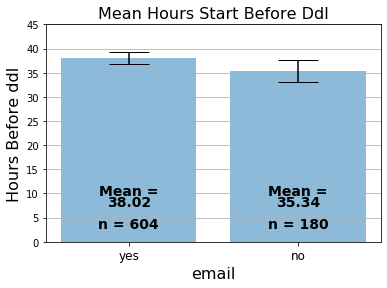

In [14]:
# for plot_main, will look at column email_no(right) in reduced_table, but will not look at column email_yes(left) in
# reduced_table, so even np.array([['hahaha','no']]) is okay here
plot_main(reduced_table, np.array(['email']), np.array([['yes', 'no']]), 'hours_start', 
    'Hours Before ddl', 'Mean Hours Start Before ddl', 45.0, False, 0.0)

In general case, in week 6, students in CSC108 who recieved emails reminding students about the homework start homework earlier than students in CSC108 who have not recieved emails, since the mean hours start before the ddl of students received emails is around 3 hours earlier than students who have not received emails.

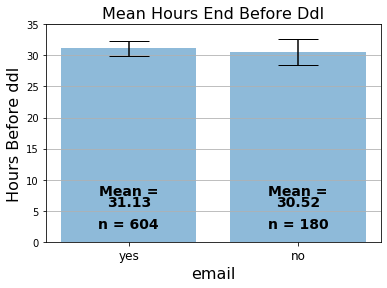

In [20]:
plot_main(reduced_table, np.array(['email']), np.array([['yes', 'no']]), 'hours_end', 
    'Hours Before ddl', 'Mean Hours End Before ddl', 35.0, False, 0.0)

In general case, in week 6, students in CSC108 who recieved emails reminding students about the homework end homework slightly earlier than students in CSC108 who have not recieved emails, since the mean hours end before the ddl of students received emails is slightly more than students who have not received emails. But the influence is small.

## Short Body vs Long Body

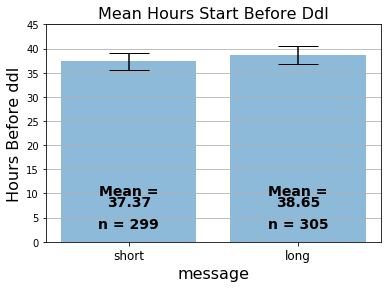

In [26]:
plot_main(reduced_table[reduced_table['email_yes'] == 1], np.array(['message']), np.array([['short', 'long']]), 'hours_start', 
    'Hours Before ddl', 'Mean Hours Start Before ddl', 45.0, False, 0.0)

In general case, in week 6, students in CSC108 who recieved emails with longer body start homework earlier than students in CSC108 who recieved emails in short body, since the mean hours start before the ddl of students received long emails is more than students who received short emails.

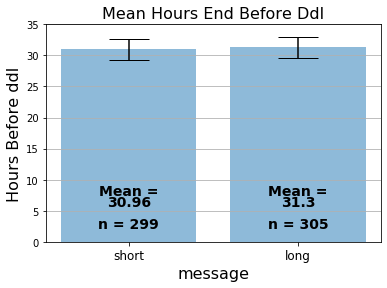

In [23]:
plot_main(reduced_table[reduced_table['email_yes'] == 1], np.array(['message']), np.array([['short', 'long']]), 'hours_end', 
    'Hours Before ddl', 'Mean Hours End Before ddl', 35.0, False, 0.0)

In general case, in week 6, students in CSC108 who recieved long emails end homework slightly earlier than students in CSC108 who have recieved short emails, since the mean hours end before the ddl of students received long emails is slightly more than students who received short emails. But the influence is small.

## Question vs Statement

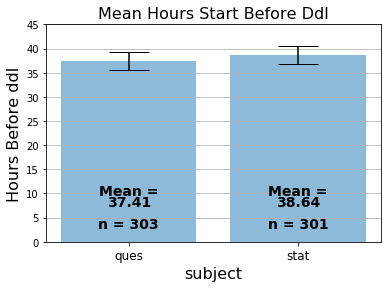

In [28]:
plot_main(reduced_table[reduced_table['email_yes'] == 1], np.array(['subject']), np.array([['ques', 'stat']]), 'hours_start', 
    'Hours Before ddl', 'Mean Hours Start Before ddl', 45.0, False, 0.0)

In general case, in week 6, students in CSC108 who recieved emails with statement subject start homework earlier than students in CSC108 who recieved emails with question subject, since the mean hours start before the ddl of students received emails with statement subject is more than students who received emails with question subject.

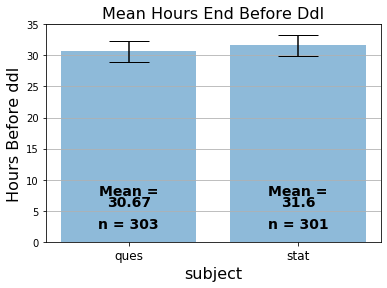

In [30]:
plot_main(reduced_table[reduced_table['email_yes'] == 1], np.array(['subject']), np.array([['ques', 'stat']]), 'hours_end', 
    'Hours Before ddl', 'Mean Hours End Before ddl', 35.0, False, 0.0)

In general case, in week 6, students in CSC108 who recieved emails with statement subject end homework earlier than students in CSC108 who recieved emails with question subject, since the mean hours end before the ddl of students received emails with statement subject is more than students who received emails with question subject.

## Tuesday vs Thursday

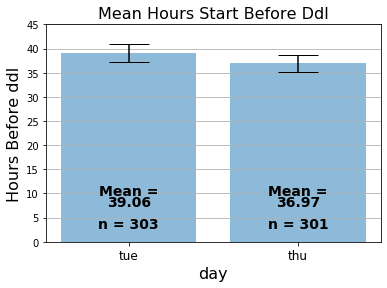

In [31]:
plot_main(reduced_table[reduced_table['email_yes'] == 1], np.array(['day']), np.array([['tue', 'thu']]), 'hours_start', 
    'Hours Before ddl', 'Mean Hours Start Before ddl', 45.0, False, 0.0)

In general case, in week 6, students in CSC108 who recieved emails in Tuesday (received emails earlier) start homework earlier than students in CSC108 who recieved emails in Thursday (received emails later), since the mean hours start before the ddl of students received emails in Tuesday is more than students who received emails in Thursday.

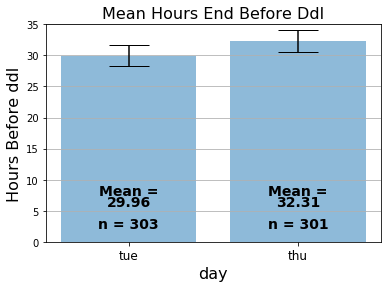

In [32]:
plot_main(reduced_table[reduced_table['email_yes'] == 1], np.array(['day']), np.array([['tue', 'thu']]), 'hours_end', 
    'Hours Before ddl', 'Mean Hours End Before ddl', 35.0, False, 0.0)

In general case, in week 6, students in CSC108 who recieved emails in Thursday (received emails later) end homework earlier than students in CSC108 who recieved emails in Tuesday (received emails earlier), since the mean hours end before the ddl of students received emails in Thursday is more than students who received emails in Tuesday.

# Contextual Variables

In [15]:
from ipynb.fs.full.plot import plot_interactions

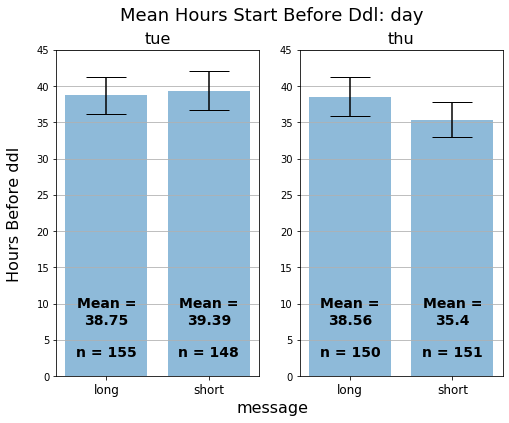

In [16]:
# IMPORTANT: reduced_table[reduced_table['email_yes'] == 1
plot_interactions(reduced_table[reduced_table['email_yes'] == 1], np.array(['message']), np.array([['long', 'short']]), 
    'hours_start', 'Hours Before ddl', 'Mean Hours Start Before ddl', np.array(['day']), np.array([['tue', 'thu']]), 
        max_plot_val=45.0)

If the email is sent in Tuesday, short email body is slight more effective than long email body, since for emails sent in Tuesday, the mean hours start before ddl for short messages is slightly more than the mean hours start before ddl for long messages. <br/>
However, if the email is sent in Thursday, long email body is more effective than short email body, since for emails sent in Thursday, the mean hours start before ddl for long messages is around 3 hours more than the mean hours start before ddl for short messages. <br />
So for emails sent in Tuesday, we should use short email body, and for emails sent in Thursday, we should use long email body.